<a href="https://colab.research.google.com/github/Carmen-GL/repo_master_/blob/main/10_Pytorch_DL_AE_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![IDAL](https://i.imgur.com/tIKXIG1.jpg)  

#<strong>**Máster en Inteligencia Artificial Avanzada y Aplicada  IA^3**</strong>
---


#<center>Autoencoder simple</center>

Dataset origen: https://github.com/zalandoresearch/fashion-mnist


In [10]:
# Comandos de instalación por si falla la importación
# !conda install numpy pandas pytorch torchvision cpuonly -c pytorch -y
# !pip install matplotlib --upgrade --quiet

In [19]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.utils import save_image
%matplotlib inline

In [12]:
# constants
NUM_EPOCHS = 50
LEARNING_RATE = 1e-3
BATCH_SIZE = 128
# image transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

## Preparación de los datos

In [13]:
trainset = FashionMNIST(
    root='./data',
    train=True, 
    download=True,
    transform=transform
)
testset = FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
trainloader = DataLoader(
    trainset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)
testloader = DataLoader(
    testset, 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

images.shape: torch.Size([128, 1, 28, 28])


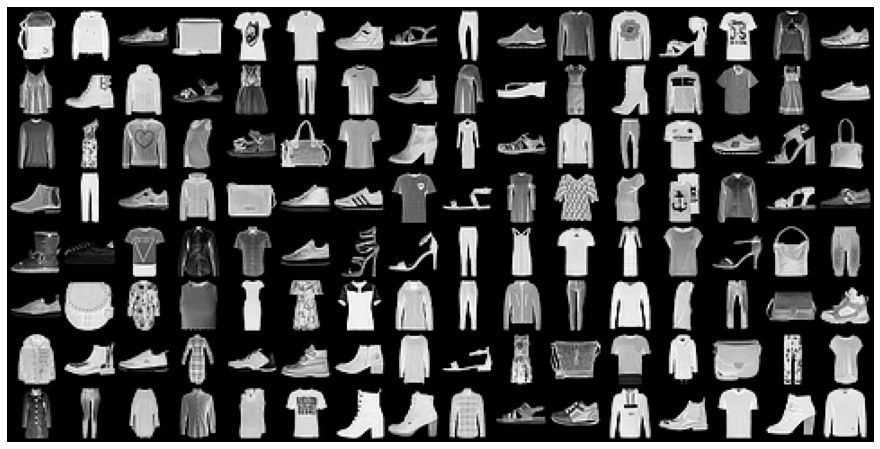

In [20]:
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [15]:
# utility functions
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device
def make_dir():
    image_dir = 'FashionMNIST_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
def save_decoded_image(img, epoch):
    img = img.view(img.size(0), 1, 28, 28)
    save_image(img, './FashionMNIST_Images/linear_ae_image{}.png'.format(epoch))

## Modelo

In [21]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # encoder
        self.enc1 = nn.Linear(in_features=784, out_features=256)
        self.enc2 = nn.Linear(in_features=256, out_features=128)
        self.enc3 = nn.Linear(in_features=128, out_features=64)
        self.enc4 = nn.Linear(in_features=64, out_features=32)
        self.enc5 = nn.Linear(in_features=32, out_features=16)
        # decoder 
        self.dec1 = nn.Linear(in_features=16, out_features=32)
        self.dec2 = nn.Linear(in_features=32, out_features=64)
        self.dec3 = nn.Linear(in_features=64, out_features=128)
        self.dec4 = nn.Linear(in_features=128, out_features=256)
        self.dec5 = nn.Linear(in_features=256, out_features=784)
    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))
        x = F.relu(self.enc5(x))
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = F.relu(self.dec4(x))
        x = F.relu(self.dec5(x))
        return x
net = Autoencoder()
print(net)

Autoencoder(
  (enc1): Linear(in_features=784, out_features=256, bias=True)
  (enc2): Linear(in_features=256, out_features=128, bias=True)
  (enc3): Linear(in_features=128, out_features=64, bias=True)
  (enc4): Linear(in_features=64, out_features=32, bias=True)
  (enc5): Linear(in_features=32, out_features=16, bias=True)
  (dec1): Linear(in_features=16, out_features=32, bias=True)
  (dec2): Linear(in_features=32, out_features=64, bias=True)
  (dec3): Linear(in_features=64, out_features=128, bias=True)
  (dec4): Linear(in_features=128, out_features=256, bias=True)
  (dec5): Linear(in_features=256, out_features=784, bias=True)
)


In [22]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

##Dispositivo (GPU o CPU)

In [23]:
# get the computation device
device = get_device()
print(device)
# load the neural network onto the device
net.to(device)
make_dir()


cuda:0


## Entrenamiento

In [24]:
def train(net, trainloader, NUM_EPOCHS):
    train_loss = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        for data in trainloader:
            img, _ = data
            img = img.to(device)
            img = img.view(img.size(0), -1)
            optimizer.zero_grad()
            outputs = net(img)
            loss = criterion(outputs, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        loss = running_loss / len(trainloader)
        train_loss.append(loss)
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(
            epoch+1, NUM_EPOCHS, loss))
        
        #cada 5 epoch, guarda el registro para ver cómo queda la imagen
        if epoch % 5 == 0:
            save_decoded_image(outputs.cpu().data, epoch)
    return train_loss
def test_image_reconstruction(net, testloader):
     for batch in testloader:
        img, _ = batch
        img = img.to(device)
        img = img.view(img.size(0), -1)
        outputs = net(img)
        outputs = outputs.view(outputs.size(0), 1, 28, 28).cpu().data
        save_image(outputs, 'fashionmnist_reconstruction.png')
        break

Epoch 1 of 50, Train Loss: 0.076
Epoch 2 of 50, Train Loss: 0.036
Epoch 3 of 50, Train Loss: 0.030
Epoch 4 of 50, Train Loss: 0.027
Epoch 5 of 50, Train Loss: 0.024
Epoch 6 of 50, Train Loss: 0.024
Epoch 7 of 50, Train Loss: 0.023
Epoch 8 of 50, Train Loss: 0.022
Epoch 9 of 50, Train Loss: 0.021
Epoch 10 of 50, Train Loss: 0.021
Epoch 11 of 50, Train Loss: 0.020
Epoch 12 of 50, Train Loss: 0.020
Epoch 13 of 50, Train Loss: 0.020
Epoch 14 of 50, Train Loss: 0.020
Epoch 15 of 50, Train Loss: 0.019
Epoch 16 of 50, Train Loss: 0.019
Epoch 17 of 50, Train Loss: 0.019
Epoch 18 of 50, Train Loss: 0.018
Epoch 19 of 50, Train Loss: 0.018
Epoch 20 of 50, Train Loss: 0.018
Epoch 21 of 50, Train Loss: 0.018
Epoch 22 of 50, Train Loss: 0.017
Epoch 23 of 50, Train Loss: 0.017
Epoch 24 of 50, Train Loss: 0.017
Epoch 25 of 50, Train Loss: 0.017
Epoch 26 of 50, Train Loss: 0.017
Epoch 27 of 50, Train Loss: 0.016
Epoch 28 of 50, Train Loss: 0.016
Epoch 29 of 50, Train Loss: 0.016
Epoch 30 of 50, Train L

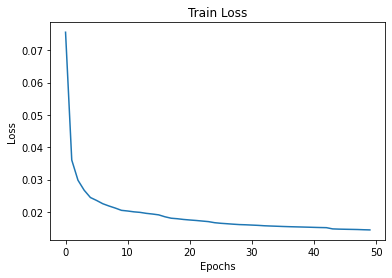

In [25]:
# train the network
train_loss = train(net, trainloader, NUM_EPOCHS)
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('deep_ae_fashionmnist_loss.png')
# test the network
test_image_reconstruction(net, testloader)

##Visualizamos resultados

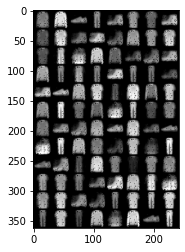

In [27]:
import matplotlib.image as mpimg

img=mpimg.imread('/content/FashionMNIST_Images/linear_ae_image0.png')

imgplot = plt.imshow(img)

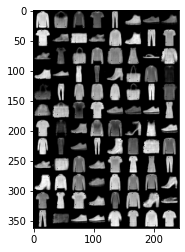

In [28]:
img=mpimg.imread('/content/FashionMNIST_Images/linear_ae_image25.png')

imgplot = plt.imshow(img)

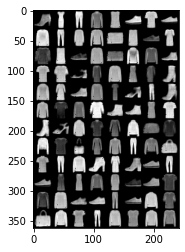

In [29]:
img=mpimg.imread('/content/FashionMNIST_Images/linear_ae_image45.png')

imgplot = plt.imshow(img)

## Fin del Notebook

Referencias y modelos empleados para el Notebook: 

*   Documentación de [Pytorch](https://pytorch.org/docs/stable/index.html) 
*   [PyTorch Tutorial for Deep Learning Researchers](https://github.com/yunjey/pytorch-tutorial) by Yunjey Choi
*   [FastAI](https://www.fast.ai/) development notebooks by Jeremy Howard.
*   Documentación y cursos en [Pierian Data](https://www.pieriandata.com/)
*   Tutoriales y notebooks del curso "Deep Learning with Pytorch: Zero to GANs" de [Aakash N S](https://jovian.ai/aakashns)
* [A visual proof that neural networks can compute any function](http://neuralnetworksanddeeplearning.com/chap4.html), también conocido como Teorema de Aproximación Universal
* [But what *is* a neural network?](https://www.youtube.com/watch?v=aircAruvnKk) - Una introducción muy intuitiva a lo que son las redes neuronales y lo que implican las capas ocultas.